In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [7]:
data = pd.read_csv(filepath_or_buffer = 'C:/Users/lokri/PycharmProjects/Pract/final_data.csv', sep= ',')

# Формирование датасетов для модели машинного обучение
np.random.seed(42)
X, y = data.iloc[:,4:], data.iloc[:,3]

# Инициализация валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
# Создание списков для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75]

# Обучение на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42,\
n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {}\
 trees".format(max(test_acc.mean(axis=1))*100, trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 37.40% with 50 trees


Text(0.5, 0, 'Параметр N_estimators')

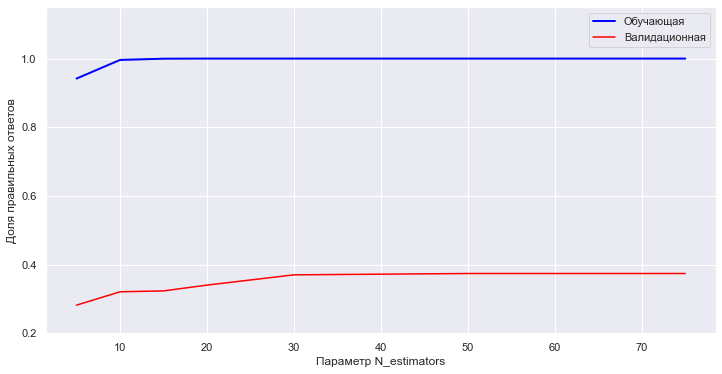

In [9]:
# Построение графика доли правильных ответов от варьируемого параметра
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(trees_grid, train_acc.mean(axis=1), linewidth = 2, color='blue', label='Обучающая')
ax.plot(trees_grid, test_acc.mean(axis=1), color='red', label='Валидационная')
ax.legend(loc='best')
ax.set_ylim([0.2,1.15])
ax.set_ylabel("Доля правильных ответов")
ax.set_xlabel("Параметр N_estimators")

In [10]:
# Использование подобранных параметров для обучения и проверка качества классификации
rfc = RandomForestClassifier(n_estimators=75, random_state=47, n_jobs=-1,\
oob_score=True, min_samples_leaf=3, max_depth = 9)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       eight       0.40      0.43      0.41        14
        five       0.22      0.14      0.17        14
        four       0.27      0.23      0.25        13
        nine       0.32      0.50      0.39        14
     not_num       0.93      1.00      0.97        14
         one       0.35      0.60      0.44        15
       seven       0.20      0.14      0.17        14
         six       0.42      0.33      0.37        15
       three       0.12      0.07      0.09        15
         two       0.30      0.21      0.25        14
        zero       0.62      0.83      0.71        12

    accuracy                           0.40       154
   macro avg       0.38      0.41      0.38       154
weighted avg       0.37      0.40      0.38       154

